In [14]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import io
import statsmodels.api as sm
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (12,7)

# **Data**
Stocks for the project: Jonson & Jonson, Nike and Apple for 5 years.


# Data collection

In [1]:
def yahoo(ticker, start, end, frequency, events, include_adj_close = 'true'):
    headers ={'User-agent': 'Mozilla/5.0'}

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&events"+str(events) +"&includeAdjustedClose=" + str(include_adj_close)
    
    r = requests.get(url, headers=headers)
    df = pd.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)
    return df

In [25]:
apple = yahoo("Aapl", start="2017-01-01", end="2022-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true' )
apple = apple.reset_index()

In [26]:
nike = yahoo("NKE", start="2017-01-01", end="2022-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
nike = nike.reset_index()

In [27]:
jnj = yahoo("JNJ", start="2017-01-01", end="2022-01-01", 
                             frequency='1d', events = 'history', include_adj_close = 'true')
jnj = jnj.reset_index()

Data plot

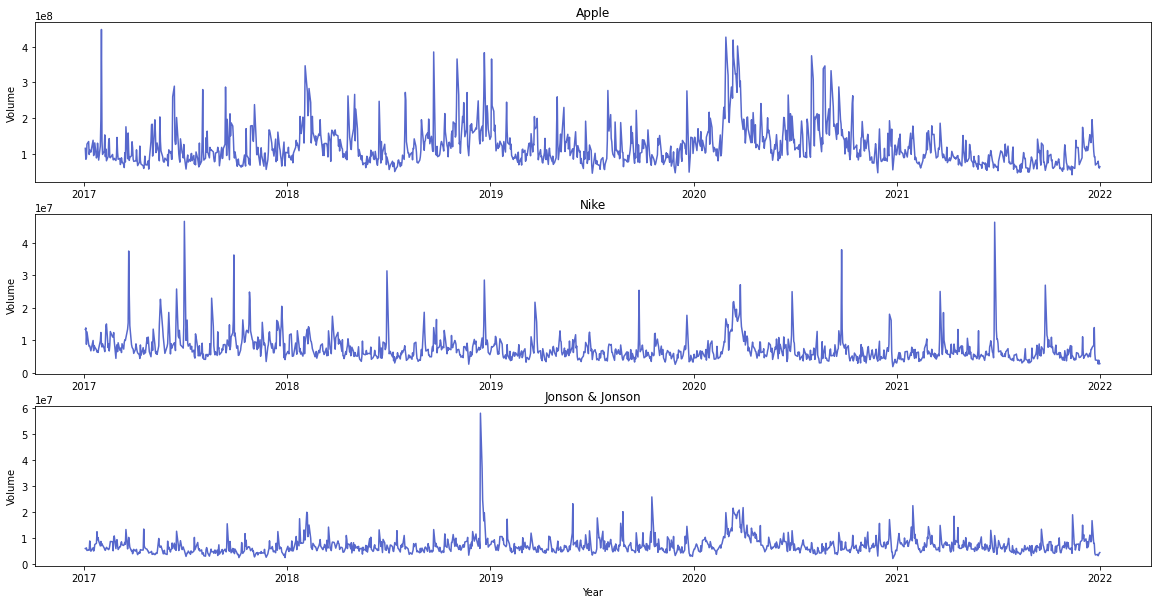

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (20,10))
plt.setp(ax, ylabel = "Volume")
plt.xlabel("Year")
ax[0].title.set_text('Apple')
ax[0].plot(apple['Date'],apple["Volume"],color = "#5768cc")
ax[1].title.set_text('Nike')
ax[1].plot(nike['Date'],nike["Volume"],color = "#5768cc")
ax[2].title.set_text('Jonson & Jonson')
ax[2].plot(jnj['Date'],jnj["Volume"],color = "#5768cc")

plt.show()

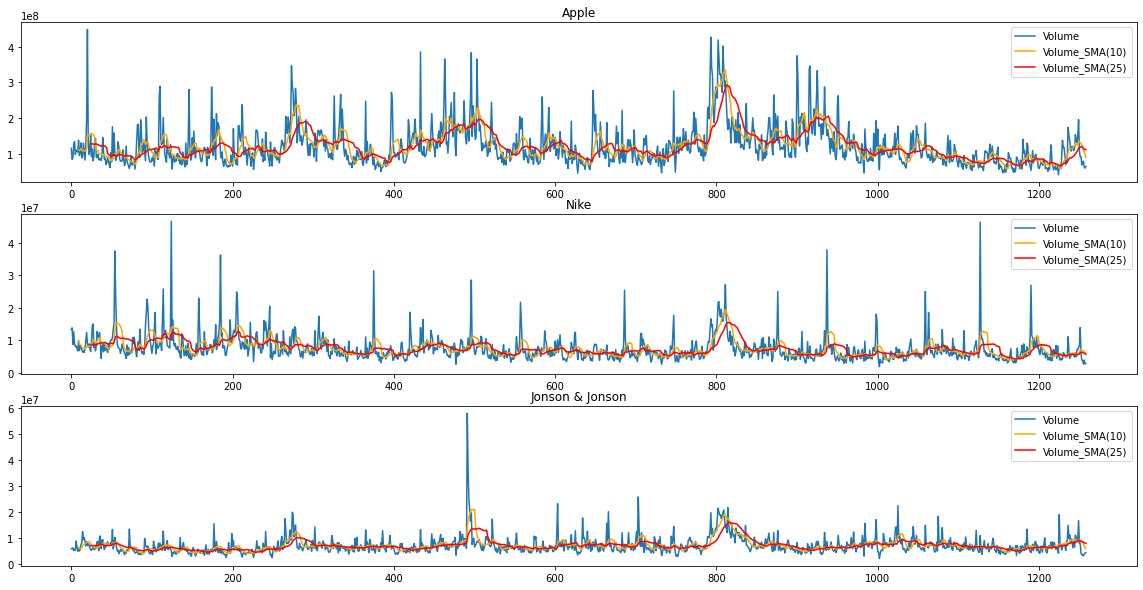

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (20,10))
l = [apple,nike,jnj]
for i in range(3):
  ax[i].plot(l[i]["Volume"])
  ax[i].plot(l[i]["Volume"].rolling(10).mean(), color = "orange")
  ax[i].plot(l[i]["Volume"].rolling(25).mean(), color = 'red')
  ax[i].legend(['Volume','Volume_SMA(10)','Volume_SMA(25)' ])
ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.show()


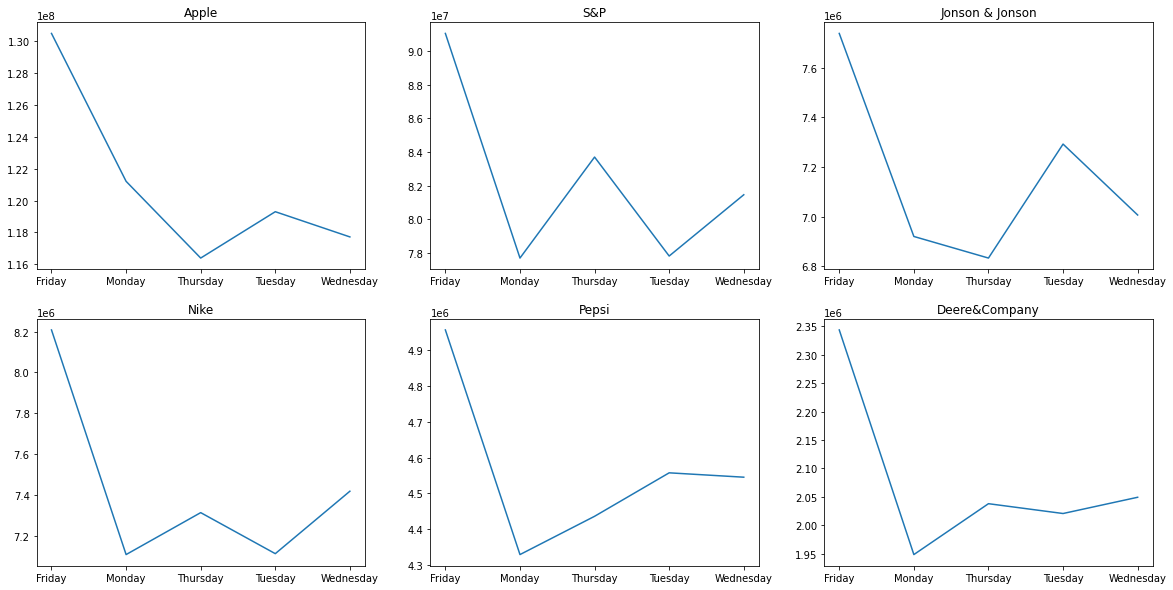

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
ax[0,0].title.set_text('Apple')
ax[0,0].plot(apple["Volume"].groupby(apple['Date'].dt.day_name()).mean())
ax[0,1].title.set_text('S&P')
ax[0,1].plot(snp["Volume"].groupby(snp['Date'].dt.day_name()).mean())
ax[1,0].title.set_text('Nike')
ax[1,0].plot(nike["Volume"].groupby(nike['Date'].dt.day_name()).mean())
ax[1,1].title.set_text('Pepsi')
ax[1,1].plot(pepsi["Volume"].groupby(pepsi['Date'].dt.day_name()).mean())
ax[0,2].title.set_text('Jonson & Jonson')
ax[0,2].plot(jnj["Volume"].groupby(jnj['Date'].dt.day_name()).mean())
ax[1,2].title.set_text('Deere&Company')
ax[1,2].plot(deere["Volume"].groupby(deere['Date'].dt.day_name()).mean())
plt.show()

# Pre-processing 

In [8]:
def new_features(df):
    """
    Creates time series features from datetime index
    """
    df['day_of_year'] = df['Date'].dt.dayofyear
    df['day_of_month'] = df['Date'].dt.day
    df['month'] = df['Date'].dt.month
    df["day_of_week"] = df['Date'].dt.dayofweek
    df["Friday"] = df['Date'].apply(lambda x: 1 if x.day_name() == "Friday" else 0)
    q = df['Volume'].values
    p = df['Close'].values
    #df = df.assign(vwap=(p * q).cumsum() / q.cumsum())


In [28]:
new_features(jnj)
new_features(nike)
new_features(apple)

In [29]:
import datetime as dt
def date_transf(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Date']= df['Date'].map(dt.datetime.toordinal)
date_transf(jnj)
date_transf(nike)
date_transf(apple)

In [19]:
#without features
l = [apple,nike,jnj]
names = ["Apple", "Nike ", "J&J  "]
for i in range(3):
    cop = l[i].copy()
    cop = cop.dropna()
    X = cop.drop("Volume", axis = 1)
    #X = sm.add_constant(X)
    model = sm.OLS(cop['Volume'],X.astype(float))
    result = model.fit()
    print('Stock : {}, R2 : {}'.format(names[i], result.rsquared.round(2)))
    print()

Stock : Apple, R2 : 0.45

Stock : Nike , R2 : 0.83

Stock : J&J  , R2 : 0.91



In [11]:
l = [apple,nike,jnj]
names = ["Apple", "Nike ", "J&J  "]
for i in range(3):
    cop = l[i].copy()
    cop = cop.dropna()
    X = cop.drop("Volume", axis = 1)
    #X = sm.add_constant(X)
    model = sm.OLS(cop['Volume'],X.astype(float))
    result = model.fit()
    print('Stock : {}, R2 : {}'.format(names[i], result.rsquared.round(2)))
    print()

Stock : Apple, R2 : 0.47

Stock : Nike , R2 : 0.84

Stock : J&J  , R2 : 0.91



# Prediction

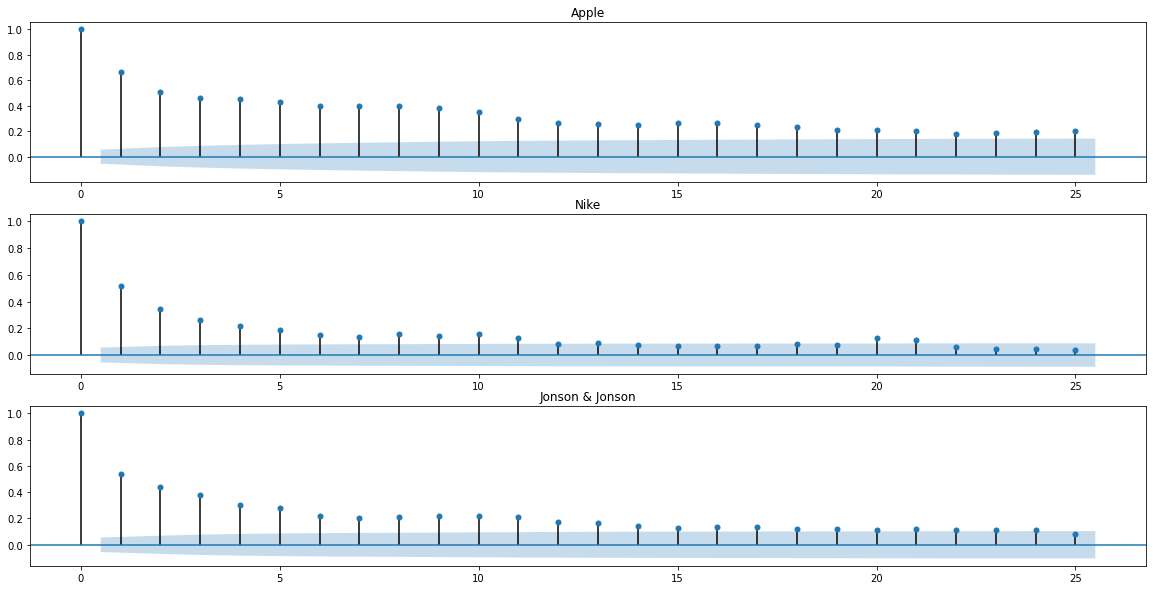

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (20,10))
l = [apple,nike,jnj]
for i in range(3):
  sm.graphics.tsa.plot_acf(l[i]["Volume"], lags = 25, ax = ax[i])
ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.show()

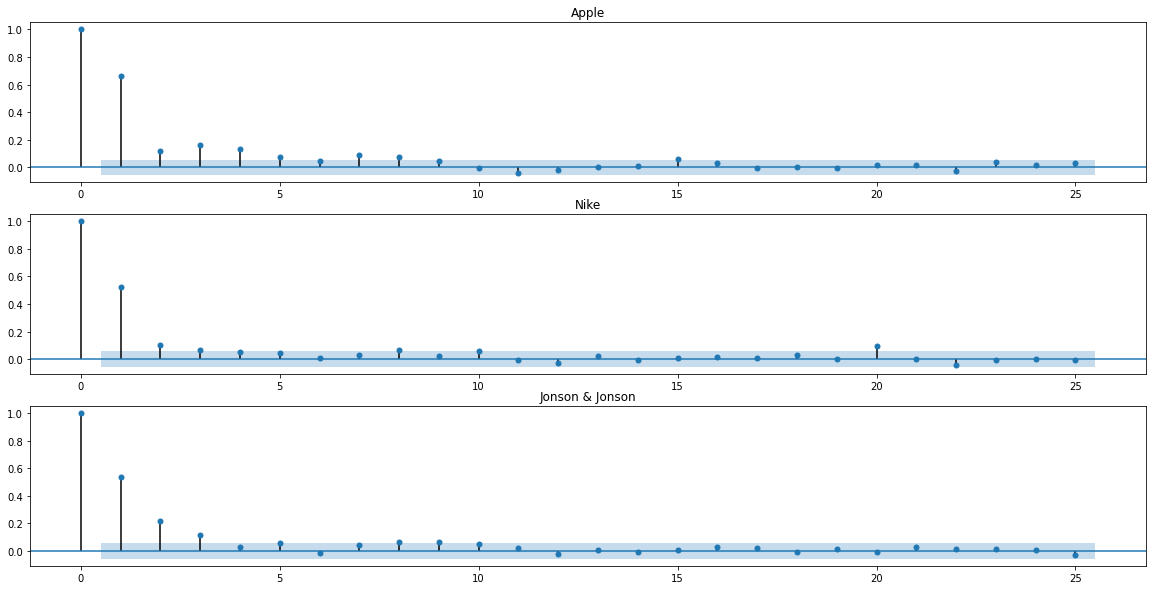

In [ ]:

fig, ax = plt.subplots(3,1, figsize = (20,10))
l = [apple,nike,jnj]
for i in range(3):
  sm.graphics.tsa.plot_pacf(l[i]["Volume"], lags = 25, ax = ax[i])
ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.show()

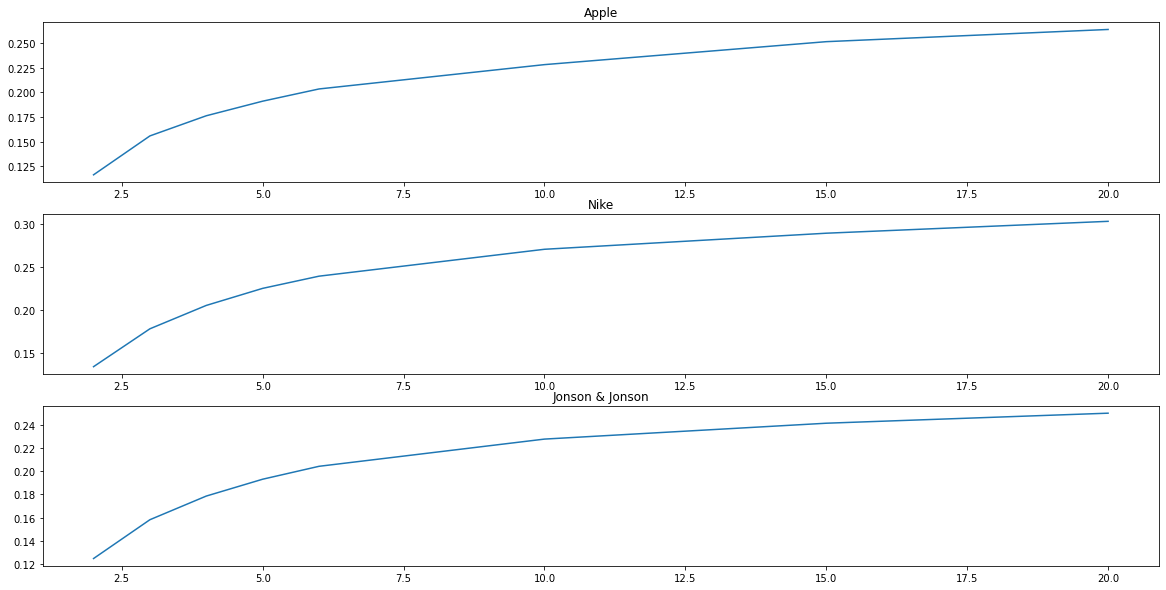

In [ ]:
#idea from https://towardsdatascience.com/an-algorithm-to-find-the-best-moving-average-for-stock-trading-1b024672299c
fig, ax = plt.subplots(3,1, figsize = (20,10))
l = [apple,nike,jnj]
windows = [2,3,4,5,6,10,15,20]
mape = []
for i in range(3):
  for j in windows:
    cop = l[i].copy()
    cop['moving_average_mean'] = cop['Volume'].rolling(window=j).mean()
    cop = cop.dropna()
    mape.append(mean_absolute_percentage_error(cop['moving_average_mean'],cop['Volume']))
  ax[i].plot(windows,mape)
  mape = []
ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.show()

In [ ]:
for i in range(3):
  l = [apple,nike,jnj]
  names = ["Apple", "Nike", "J&J"]
  windows = [2,6,20,25,50,80,100,115,200]
  print("  {}".format(names[i]))
  print("Window,R^2,F-test")
  for j in windows:
    cop = l[i].copy()
    cop['moving_average_mean'] = cop['Volume'].rolling(window=j).mean()
    #cop['moving_average_median'] = cop['Volume'].rolling(window=j).median()
    #cop = cop.drop("Volume", axis = 1)
    cop = cop.dropna()
    X = cop.drop("Volume", axis = 1)
    X = sm.add_constant(X)
    model = sm.OLS(cop['Volume'],X.astype(float))
    result = model.fit()
    print('{},{},{}'.format(j, result.rsquared.round(2), result.fvalue.round(1)))
  print()

  Apple
Window,R^2,F-test
2,0.85,602.0
6,0.66,203.7
20,0.55,123.0
25,0.54,119.9
50,0.51,104.3
80,0.5,96.0
100,0.5,94.6
115,0.5,94.0
200,0.51,91.3

  Nike
Window,R^2,F-test
2,0.78,358.8
6,0.48,94.8
20,0.38,62.4
25,0.37,60.5
50,0.36,57.0
80,0.37,58.0
100,0.37,56.4
115,0.37,55.9
200,0.39,54.7

  J&J
Window,R^2,F-test
2,0.82,458.3
6,0.63,176.4
20,0.56,129.1
25,0.56,127.2
50,0.54,119.3
80,0.54,114.4
100,0.54,110.0
115,0.54,109.5
200,0.54,101.1



In [ ]:
from sklearn.model_selection import train_test_split
for i in range(3):
  l = [apple,nike,jnj]
  names = ["Apple", "Nike", "J&J"]
  windows = [2,6,20,25,50,80,100,115,200]
  print("  {}".format(names[i]))
  print("Window,MAPE")
  for j in windows:
    cop = l[i].copy()
    cop['moving_average_mean'] = cop['Volume'].rolling(window=j).mean()
    cop = cop.dropna()
    X = cop.drop("Volume", axis = 1)
    y = cop["Volume"] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train,X_train)
    results = model.fit()
    X_test = sm.add_constant(X_test)
    predictions = results.predict(X_test)
    print('{},{}'.format( j, mean_absolute_percentage_error(y_test,predictions).round(2)))
  print()

  Apple
Window,MAPE
2,0.12
6,0.19
20,0.24
25,0.22
50,0.25
80,0.24
100,0.24
115,0.26
200,0.24

  Nike
Window,MAPE
2,0.14
6,0.25
20,0.27
25,0.28
50,0.27
80,0.28
100,0.28
115,0.27
200,0.25

  J&J
Window,MAPE
2,0.12
6,0.19
20,0.22
25,0.21
50,0.21
80,0.22
100,0.23
115,0.21
200,0.22



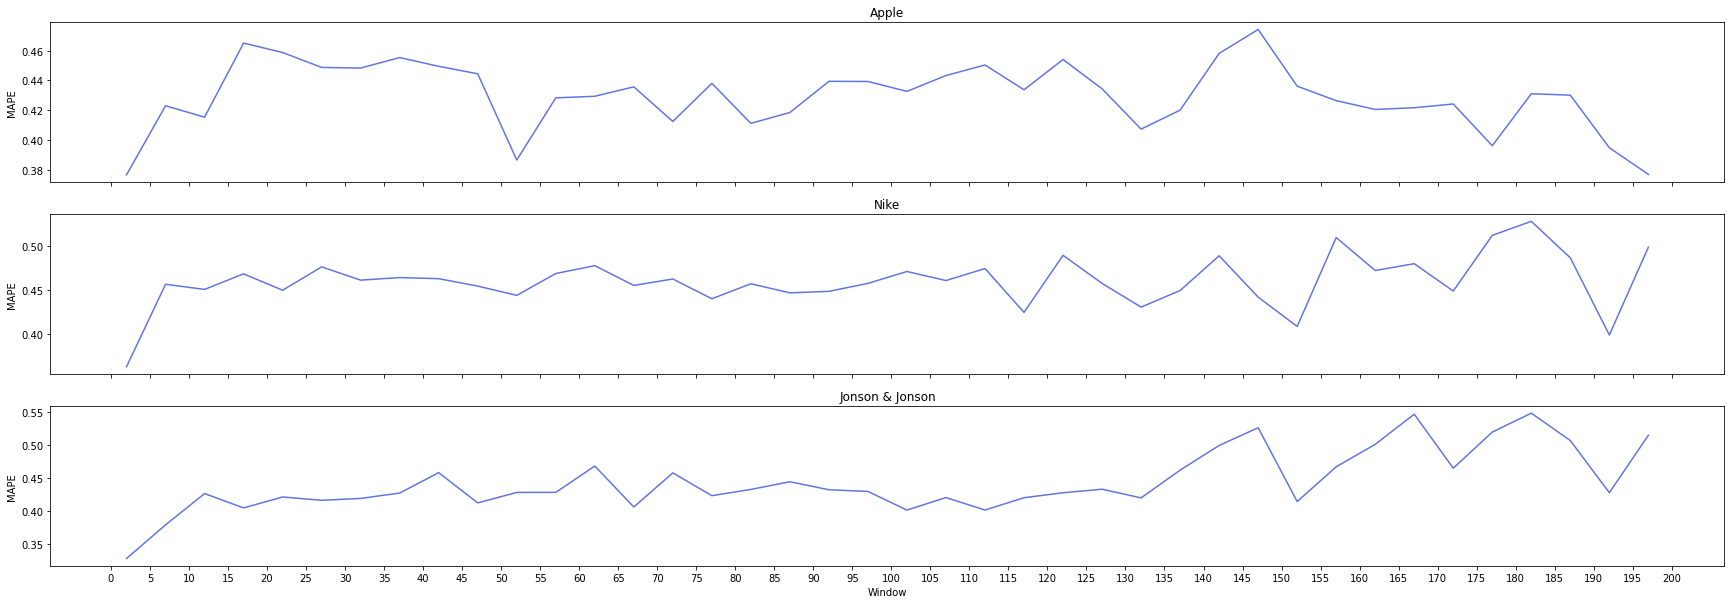

In [ ]:
from sklearn.model_selection import train_test_split
fig, ax = plt.subplots(3,1, figsize = (30,10), sharex = True)
plt.title("The MAPE error on test data")
for i in range(3):
  l = [apple,nike,jnj]
  windows = np.arange(2,201,5)
  mape = []
  cop = l[i].copy()
  X = cop.drop("Volume", axis = 1)
  y = cop["Volume"] 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  for j in windows:
    X_train['moving_average_mean'] = y_train.rolling(window=j).mean()
    X_test['moving_average_mean'] = y_test.rolling(window=j).mean()
    X_test = X_test.dropna()
    X_train = X_train.dropna()
    model = sm.OLS(y_train[j-1:],X_train)
    results = model.fit()
    predictions = results.predict(X_test)
    mape.append(mean_absolute_percentage_error(y_test[:len(predictions)],predictions))
  ax[i].plot(windows,mape, color = "#6174e3")

ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.setp(ax, xticks = np.arange(0,201,5), ylabel = "MAPE")
plt.xlabel("Window")
plt.show()


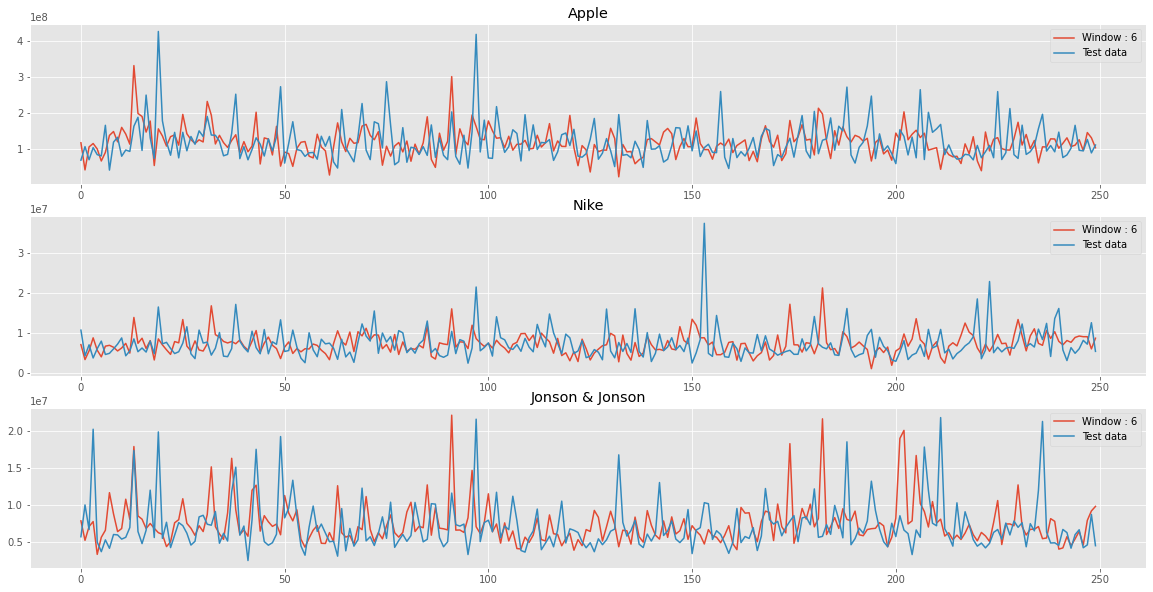

In [ ]:
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
fig, ax = plt.subplots(3,1, figsize = (20,10))
for i in range(3):
  j = 6
  l = [apple,nike,jnj]
  windows = [25]
  cop = l[i].copy()
  X = cop.drop("Volume", axis = 1)
  y = cop["Volume"] 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  X_train['moving_average_mean'] = y_train.rolling(window=j).mean()
  X_test['moving_average_mean'] = y_test.rolling(window=j).mean()
  X_test = X_test.dropna()
  X_train = X_train.dropna()
  #X_train = sm.add_constant(X_train)
  model = sm.OLS(y_train[j-1:],X_train)
  results = model.fit()
  #X_test = sm.add_constant(X_test)
  predictions = results.predict(X_test)
  ax[i].plot(np.arange(0,250,1),predictions[:250],label = "Window : {}".format(6))
  ax[i].plot(np.arange(0,250,1),y_test[:250], label = "Test data")
  ax[i].legend()

ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.show()

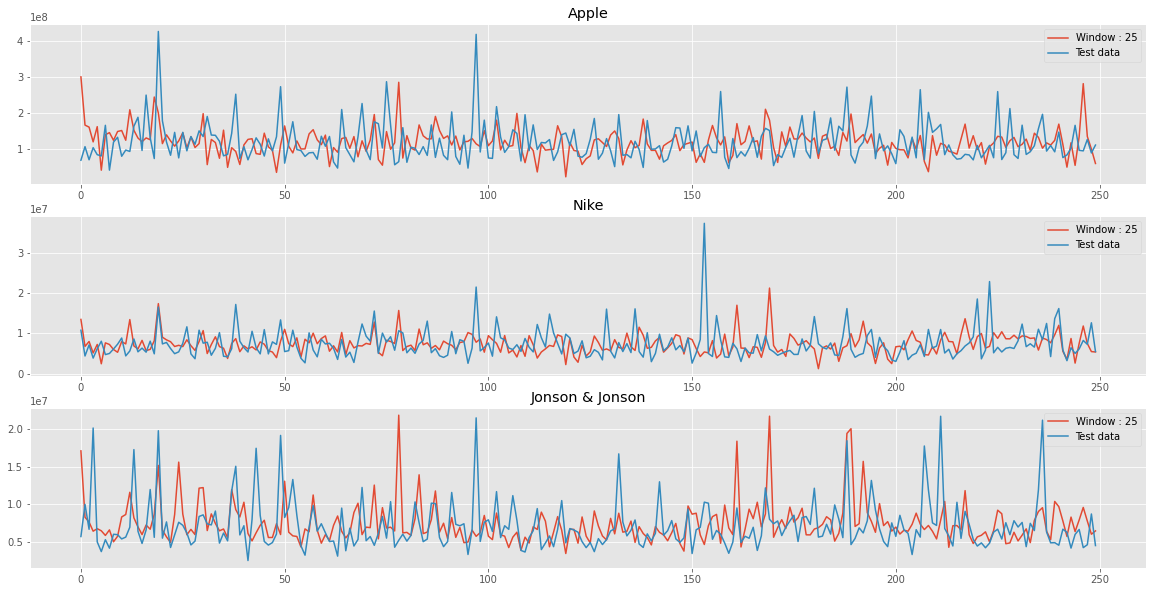

In [31]:
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
fig, ax = plt.subplots(3,1, figsize = (20,10))
for i in range(3):
  j = 25
  l = [apple,nike,jnj]
  cop = l[i].copy()
  X = cop.drop("Volume", axis = 1)
  y = cop["Volume"] 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  X_train['moving_average_mean'] = y_train.rolling(window=j).mean()
  X_test['moving_average_mean'] = y_test.rolling(window=j).mean()
  X_test = X_test.dropna()
  X_train = X_train.dropna()
  #X_train = sm.add_constant(X_train)
  model = sm.OLS(y_train[j-1:],X_train)
  results = model.fit()
  #X_test = sm.add_constant(X_test)
  predictions = results.predict(X_test)
  ax[i].plot(np.arange(0,250,1),predictions[:250],label = "Window : {}".format(25))
  ax[i].plot(np.arange(0,250,1),y_test[:250], label = "Test data")
  ax[i].legend()

ax[0].title.set_text('Apple')
ax[1].title.set_text('Nike')
ax[2].title.set_text('Jonson & Jonson')
plt.show()

### OLS

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              655.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                   1.39e-148
Time:                        22:38:02   Log-Likelihood:                         -4047.8
No. Observations:                 253   AIC:                                      8108.
Df Residuals:                     247   BIC:                                      8129.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                              1643.
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                        0.00
Time:                        12:45:43   Log-Likelihood:                         -19937.
No. Observations:                1240   AIC:                                  3.989e+04
Df Residuals:                    1232   BIC:                                  3.993e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------